In [1]:
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os.path as osp
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [37]:
t = torch.rand(5,3,4,4)
t

tensor([[[[ 0.0566,  0.2994,  0.5238,  0.5673],
          [ 0.6879,  0.5160,  0.7662,  0.5111],
          [ 0.5821,  0.1983,  0.3498,  0.9470],
          [ 0.0636,  0.1655,  0.6997,  0.8006]],

         [[ 0.8963,  0.2087,  0.0920,  0.6892],
          [ 0.4505,  0.7249,  0.8670,  0.4807],
          [ 0.3703,  0.6205,  0.7600,  0.0542],
          [ 0.1889,  0.2733,  0.3920,  0.7329]],

         [[ 0.1320,  0.0530,  0.6082,  0.7125],
          [ 0.1346,  0.7075,  0.5034,  0.6973],
          [ 0.1310,  0.0389,  0.0145,  0.4133],
          [ 0.2103,  0.8347,  0.5547,  0.0671]]],


        [[[ 0.9750,  0.4186,  0.9378,  0.0289],
          [ 0.3356,  0.6919,  0.1459,  0.6706],
          [ 0.2750,  0.6823,  0.9785,  0.5862],
          [ 0.7133,  0.5200,  0.8953,  0.5795]],

         [[ 0.6640,  0.5755,  0.3480,  0.0858],
          [ 0.1839,  0.3895,  0.0508,  0.9142],
          [ 0.2540,  0.4161,  0.5137,  0.9562],
          [ 0.2193,  0.6299,  0.0204,  0.7188]],

         [[ 0.3882,  0.1147,

In [46]:
r = t.view(5,-1).max(dim=1)[0]
# r > r.mean()
s = t[r < r.mean()]
s

tensor([[[[ 0.0566,  0.2994,  0.5238,  0.5673],
          [ 0.6879,  0.5160,  0.7662,  0.5111],
          [ 0.5821,  0.1983,  0.3498,  0.9470],
          [ 0.0636,  0.1655,  0.6997,  0.8006]],

         [[ 0.8963,  0.2087,  0.0920,  0.6892],
          [ 0.4505,  0.7249,  0.8670,  0.4807],
          [ 0.3703,  0.6205,  0.7600,  0.0542],
          [ 0.1889,  0.2733,  0.3920,  0.7329]],

         [[ 0.1320,  0.0530,  0.6082,  0.7125],
          [ 0.1346,  0.7075,  0.5034,  0.6973],
          [ 0.1310,  0.0389,  0.0145,  0.4133],
          [ 0.2103,  0.8347,  0.5547,  0.0671]]],


        [[[ 0.7975,  0.9393,  0.9268,  0.9408],
          [ 0.9113,  0.8309,  0.2551,  0.9044],
          [ 0.6472,  0.3073,  0.6576,  0.8480],
          [ 0.8297,  0.2060,  0.1184,  0.1749]],

         [[ 0.6649,  0.7453,  0.1219,  0.2848],
          [ 0.8657,  0.7779,  0.8952,  0.0127],
          [ 0.8803,  0.1777,  0.4601,  0.3185],
          [ 0.1572,  0.0230,  0.1069,  0.6218]],

         [[ 0.0213,  0.1614,

In [55]:
print(t.view(5,-1).size())
torch.norm(t.view(5,-1), dim=1)
# t.size()


torch.Size([5, 48])


tensor([ 3.6305,  3.7911,  4.2638,  3.8784,  4.2560])

In [86]:
small_data = torchvision.datasets.ImageFolder('small', transform=transforms.ToTensor())


In [87]:
i = 4
print(small_data[i][1])
small_data[i][0].size()


4


torch.Size([3, 224, 224])

In [88]:
model = torchvision.models.resnet18(pretrained=True)


In [117]:
model.parameters

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (rel

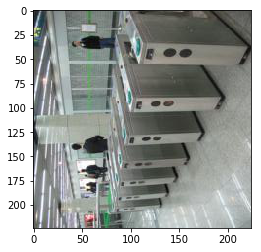

tensor([ 877])


In [114]:
model.eval()

i = 17
a = model(small_data[i][0].unsqueeze(0))

# small_data[i][0].numpy().T.shape

plt.imshow(small_data[i][0].numpy().T)
plt.show()

pred = torch.argmax(model(small_data[i][0].unsqueeze(0)), 1)
print(pred)


In [93]:
torch.argmax(a,1)


tensor([ 385])

In [115]:
def FGSM(images,
         labels,
         model,
         target,
         epsilon=5e-2,
         num_iters=1000,
         max_L2_norm=None):
    '''
    Generate adversarial images utilizing the Fast Gradient Sign method
    Arguments:
        - input_imgs: torch tensor of input images
        - model: model used to make predictions
        - target: class to trick the model into predicting
        - epsilon: scalar by which to multiply gradient when perturbing natural input
        - num_iters: maximum number of times to add a perturbation to image
    '''
    batch_size = images.size()[0]
    images = images.clone()    
    
    # Only generate adversarial images for images that are correctly classified
    pred = torch.argmax(model(images), 1)
    mask = (pred == labels)
    images = images[mask]
    
    images.requires_grad_(True)  # very important!
    
    
    perturbation = torch.zeros_like(images)
    fooled = False
    iteration = 0

    dout = torch.zeros_like(model(images), dtype=torch.float)
    dout[:,target] = 1.  # only compute gradient w.r.t. target class
    
    
    required_iters = torch.zeros(batch_size)

    while fooled is False and iteration < num_iters:
        
        output = model(images)
        model.zero_grad() # zero out all gradients in model so they don't accumulate
        grad = torch.autograd.grad(outputs=output, inputs=input_imgs, grad_outputs=dout)[0]
        
        with torch.no_grad():
            
            perturbation.add_(epsilon * grad )
            images.add_(epsilon * grad)
            
            predictions = torch.argmax(model(images), 1)
            
            # If an example is correctly predicted, set all upward gradients
            # flowing to that example to zero; we've successfully found an
            # adversarial image that tricks the model and no longer need to 
            # update the original. We keep looping to find successfull
            # adversarial images for the other examples.
            dout[:,target] = (predictions != target)
            required_iters.add_( (predictions != target).type(torch.float) )
            
            # If every adversarial example fooled the model, we're done
            if (predictions == target).sum() == batch_size:
                fooled = True
            iteration += 1
            
    return (perturbation.detach(), images.detach())